<a href="https://colab.research.google.com/github/brayan-mesquita/pandas/blob/main/analise_naufragio_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Principais informações
O naufrágio do RMS Titanic é um dos naufrágios mais infames da história. Em 15 de abril de 1912, durante sua viagem inaugural, o Titanic afundou após colidir com um iceberg, matando 1.502 dos 2.224 passageiros e tripulantes. Esta tragédia sensacional chocou a comunidade internacional e levou a melhores regras de segurança para os navios
Pclass: um substituto para o status socioeconômico (SES)

1º = Superior
2º = meio
3º = Inferior
___
[Link analise titanic](https://jkarakas.github.io/Exploratory-Analysis-of-the-Titanic-Dataset/Titanic_Dataset_Exploratory_Analysis_No_Code.html#Exploratory-Analysis-of-the-Titanic-Dataset)

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# objetivos
- percentual de homens x mulheres
- media de idade dos que morreram e nao morreram
- percentual de sobreviventes x classes

Passos            | Objetivos|
----------------- | ------
criar variaveis   | selecionar dados atraves do data frame|

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

## visao inicial dos dados

In [15]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## tipos de dados

In [18]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## colunas

In [3]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
len(df.columns)

12

### renomeando colunas

In [19]:
#renomeando colunas 1 forma
df.columns = ['id', 'sobrevivente', 'classe', 'nome', 'sexo', 'idade', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'cabine', 'Embarked']
#renomeando colunas 2 forma
df.rename(columns = {"Ticket":"bilhete", "Embarked": "embarcado"})

,id,sobrevivente,classe,nome,sexo,idade,SibSp,Parch,bilhete,Fare,cabine,embarcado
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## loc

In [23]:
#loc para linha e coluna
df.loc[...,['nome','sexo','idade']]

,nome,sexo,idade
0,"Braund, Mr. Owen Harris",male,22.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0
2,"Heikkinen, Miss. Laina",female,26.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0
4,"Allen, Mr. William Henry",male,35.0
...,...,...,...
886,"Montvila, Rev. Juozas",male,27.0
887,"Graham, Miss. Margaret Edith",female,19.0
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN
889,"Behr, Mr. Karl Howell",male,26.0


In [48]:
_idade = df[df['idade'] < 30]
_idade['sexo'].value_counts()

male      237
female    147
Name: sexo, dtype: int64

# seaborn

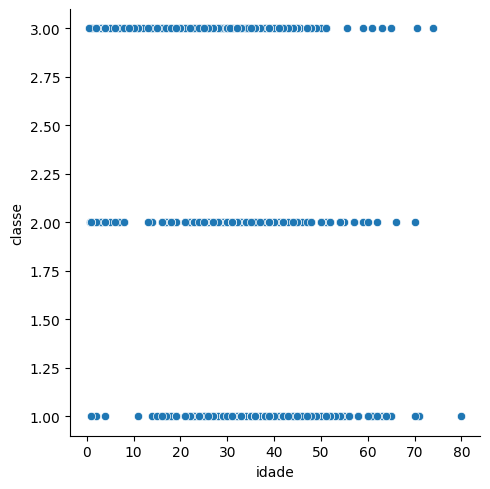

In [49]:
sns.relplot(data=df, x="idade", y="classe")

<AxesSubplot: xlabel='idade'>

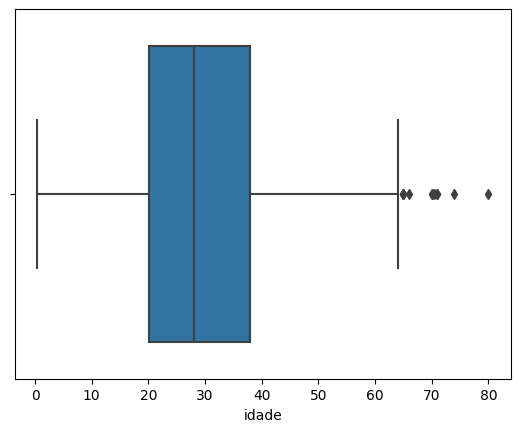

In [24]:
sns.boxplot(x=df["idade"])

### histograma

<AxesSubplot: xlabel='idade', ylabel='Count'>

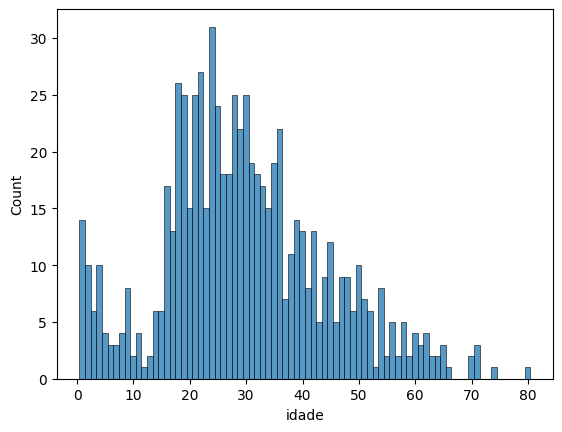

In [52]:
sns.histplot(df['idade'], binwidth=1)

<AxesSubplot: xlabel='idade', ylabel='Count'>

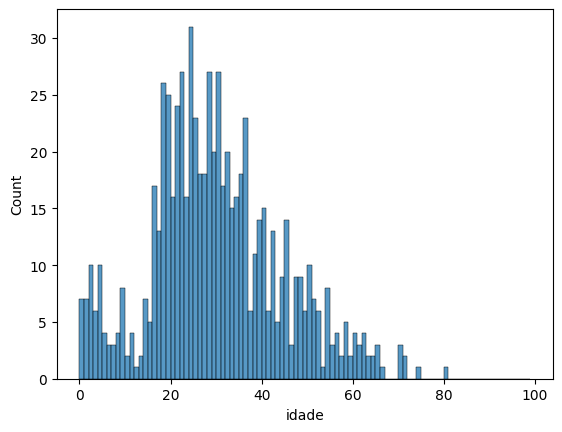

In [57]:
sns.histplot(df['idade'], bins=[x for x in range(100)])

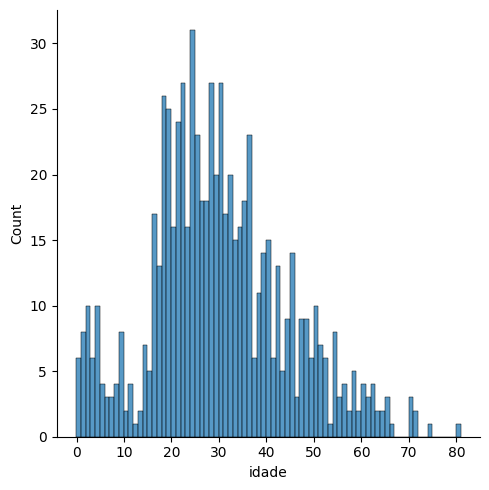

In [58]:
sns.displot(df, x='idade', discrete=True)

### boxplot

<AxesSubplot: xlabel='idade', ylabel='sexo'>

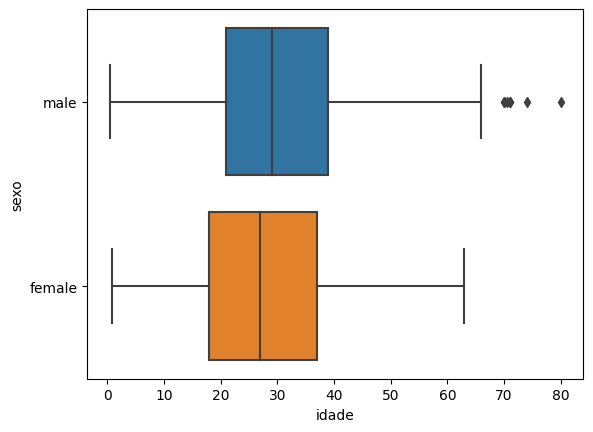

In [60]:
sns.boxplot(data=df, x="idade", y="sexo")

In [ ]:
sobrevientes = df[df['sobrevivente'] == 1].count()
nao_sobreviventes = df[df['sobrevivente'] == 0].count()

In [ ]:
sobrevientes

id              342
sobrevivente    342
classe          342
nome            342
sexo            342
idade           290
SibSp           342
Parch           342
Ticket          342
Fare            342
cabine          136
Embarked        340
dtype: int64

In [ ]:
percentual_sobreviventes = sobrevientes / nao_sobreviventes * 100

In [ ]:
percentual_sobreviventes

id               62.295082
sobrevivente     62.295082
classe           62.295082
nome             62.295082
sexo             62.295082
idade            68.396226
SibSp            62.295082
Parch            62.295082
Ticket           62.295082
Fare             62.295082
cabine          200.000000
Embarked         61.930783
dtype: float64

In [ ]:
sobrevientes.describe()

,id,sobrevivente,classe,idade,SibSp,Parch,Fare
count,342.000000,342.0,342.000000,290.000000,342.000000,342.000000,342.000000
mean,444.368421,1.0,1.950292,28.343690,0.473684,0.464912,48.395408
std,252.358840,0.0,0.863321,14.950952,0.708688,0.771712,66.596998
min,2.000000,1.0,1.000000,0.420000,0.000000,0.000000,0.000000
25%,250.750000,1.0,1.000000,19.000000,0.000000,0.000000,12.475000
50%,439.500000,1.0,2.000000,28.000000,0.000000,0.000000,26.000000
75%,651.500000,1.0,3.000000,36.000000,1.000000,1.000000,57.000000
max,890.000000,1.0,3.000000,80.000000,4.000000,5.000000,512.329200


In [ ]:
age = df['Age']
type(age)

pandas.core.series.Series

filtrando dados da coluna idade


In [ ]:
df[(df.Age > 28) & (df.Age < 30)].head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
53,54,1,2,"Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...",female,29.0,1,0,2926,26.0000,NaN,S
57,58,0,3,"Novel, Mr. Mansouer",male,28.5,0,0,2697,7.2292,NaN,C
66,67,1,2,"Nye, Mrs. (Elizabeth Ramell)",female,29.0,0,0,C.A. 29395,10.5000,F33,S


Outra sintaxe para filtrar

In [ ]:
df[df['Age'] == 30 ].head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
79,80,1,3,"Dowdell, Miss. Elizabeth",female,30.0,0,0,364516,12.475,NaN,S
157,158,0,3,"Corn, Mr. Harry",male,30.0,0,0,SOTON/OQ 392090,8.050,NaN,S
178,179,0,2,"Hale, Mr. Reginald",male,30.0,0,0,250653,13.000,NaN,S


In [ ]:
df.loc[1].head() #dados do primeiro index

PassengerId                                                    2
Survived                                                       1
Pclass                                                         1
Name           Cumings, Mrs. John Bradley (Florence Briggs Th...
Sex                                                       female
Name: 1, dtype: object

In [ ]:
df.loc[[1,2,3]] #dados dos 3 primeiros

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


É possível selecionar **vários índices e várias colunas de uma vez só**. Passamos uma lista com os índices e uma outra lista com as colunas.

In [ ]:
df.loc[[1,2,4], ['Name','Sex','Age']]

,Name,Sex,Age
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0
2,"Heikkinen, Miss. Laina",female,26.0
4,"Allen, Mr. William Henry",male,35.0


O loc também é usado para fazer slice (fatiamento)


In [ ]:
df.loc[10:15]
#df.loc[10:30:2] para incrementar de dois em dois
#df.loc[10:] do intem 10 para frente

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S


Consultando dados com o **query**

**CONDIÇÕES**
 operadores lógicos AND(&) e OR( | ) e expressões lógicas (==, != , >, <, >= e <=)

In [ ]:
df.query('Age > 20').head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.query('Age > 20 & Sex=="male"').head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
20,21,0,2,"Fynney, Mr. Joseph J",male,35.0,0,0,239865,26.0000,NaN,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C


Com o operador lógico OU

In [ ]:
df.query('Age > 20 | Sex=="male"').head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Se usarmos o inplace=True o nosso DataFrame original será substituído pelo novo DataFrame com a condição que foi passada. Para retornar ao DataFrame original será preciso fazer a leitura do arquivo novamente

In [ ]:
df.query('Embarked in ["C","Q"]', inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C


fonte: https://minerandodados.com.br/analise-de-dados-com-python-usando-pandas/